# <span style='background-color: #fff5b1'>오늘의 한 걸음  🚶🏽‍♂️: 뉴스 카테고리 분류 모델 : 머신러닝과 딥러닝 비교 </span>

## Contexts

### 1. READY
    1-1 오늘의 Exp와 Rubric  
    1-2 사용하는 라이브러리  
    1-3 데이터 읽어오기

### 2. GAME ( 모델별 비교 )
    2-1. 머신러닝 - 모든 단어 사용
    2-2. 머신러닝 - 상위 5000개 단어만 사용 (소요시간 함께 측정)
    2-3. 머신러닝 - 상위 10000개 단어 사용 (가장 높은 정확도)
    2-4. 딥러닝 - RNN 사용


### 3. POTG (best Play Of The Game
    3-1. 소감(POTG)  
    3-2. 어려웠던 점과 극복방안  
    3-3. 추후  

---


# 1. Ready
## 1-1. 오늘의 Exp와 Rubric


Tensor flow 에서는 NLP 학습을 위한 reuters news 자료를 제공한다.

해당 데이터의 특징은 다음과 같다.

1. 이미 전처리 된 Vocabulary (단어사전)
2. 최소 1 에서 2376 개의 단어로 구성된 뉴스 데이터 약 1만 행.

오늘은 해당 데이터를 통해 다른 변수는 모두 고정하고,

오직 모델과 단어사전의 크기만을 조정하며 결과 차이를 비교하려 한다.

이를 통해 각 모델의 성능과 차이를 직관적으로 살펴볼 수 있다.


오늘의 Rubric

|평가문항|상세기준|
|---|---|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|

## 1-2. 사용하는 라이브러리

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # 데이터 시각화
import numpy as np 
import pandas as pd #배열 처리

from tensorflow.keras.datasets import reuters #사용하는 데이터셋

from sklearn.feature_extraction.text import CountVectorizer # DTM  
from sklearn.feature_extraction.text import TfidfTransformer #TF -IDF 가중치


#사용하는 모델 종류
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC


#평가 지표
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1-3. 데이터 불러오기

In [71]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [5]:
print(f'훈련 샘플의 수: {len(x_train)}')
print(f'훈련 샘플의 수: {len(x_test)}')


num_classes = max(y_train) + 1 #가장 높은 class 의 순서
print('클래스의 수 : {}'.format(num_classes))

훈련 샘플의 수: 8982
훈련 샘플의 수: 2246
클래스의 수 : 46


이처럼 약 1만개로 이루어져 있는 뉴스 데이터를 8:2의 비율로 나누었다.  
뉴스의 주제는 46개로 분류되어 구성되어 있다.

뉴스데이터는 이미 숫자화되어 있다. `num_words` 메서드를 통해

지정한 넘버 이상의 단어는 OOV(unk) 처리되어 저장된다.

머신러닝 기법을 이용하기 위해서 숫자화된 데이터를 거꾸로  
다시 텍스트화 시켜보도록 한다.  

제공하는 메서드 `get_word_index` 를 이용해  

숫자 : 텍스트 딕셔너리를 만들고, 

각 숫자에 해당하는 텍스트를 불러와주면 된다.

In [75]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
# index_to_word 의 앞에 특별토큰 넣어주기


decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]]) #i번째 텍스트 문장에서 숫자 하나씩 빼서 단어로 변경
    decoded.append(t)

x_train = decoded
print('train 데이터의 뉴스기사 수 : ',len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print('test 데이터의 뉴스기사 수 : ',len(x_test))

train 데이터의 뉴스기사 수 :  8982
test 데이터의 뉴스기사 수 :  2246


복원된 뉴스기사는 다음과 같다.

In [28]:
x_train[0]

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

unk 는 10000을 넘어선 단어이다. sos 는 문장의 시작을 의미한다.

# 2. GAME (모델별 비교)
## 2-1. 머신러닝 - 모든 단어 사용

In [29]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [31]:
dtmvector = CountVectorizer()

# DTM 생성

x_train_dtm = dtmvector.fit_transform(x_train) #train 데이터로 DTM 생성
x_test_dtm = dtmvector.transform(x_test) #test 데이터로 DTM 생성



tfidf_transformer = TfidfTransformer()

# TF-IDF 가중치 적용

tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

print(tfidfv.shape, tfidfv_test.shape)

(8982, 26506) (2246, 26506)


### 2-1-1 Naive Bayes

In [32]:
model = MultinomialNB() 

model.fit(tfidfv, y_train) #df-IDF 값을 취한 DTM, label
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

### 2-1-2 Complement Naive Bayes

In [33]:
cb = ComplementNB()


cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

### 2-1-3 Logistic Regression

In [34]:
lr = LogisticRegression(C=10000, penalty='l2')


lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.61      0.62      0.61        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.71      0.77      0.74        99
          17       0.67    

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-1-4 Linear Support Vector Machine

In [35]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.66      0.73      0.69       105
           2       0.58      0.55      0.56        20
           3       0.90      0.91      0.91       813
           4       0.81      0.84      0.83       474
           5       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14
           7       0.50      0.33      0.40         3
           8       0.61      0.66      0.63        38
           9       0.91      0.84      0.87        25
          10       0.89      0.80      0.84        30
          11       0.65      0.72      0.68        83
          12       0.30      0.23      0.26        13
          13       0.53      0.51      0.52        37
          14       1.00      0.50      0.67         2
          15       0.38      0.33      0.35         9
          16       0.67      0.73      0.70        99
          17       0.86    

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-1-5 Decision Tree

In [36]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.43      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.58      0.60      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.83      0.70        99
          17       0.00    

### 2-1-6 Random forest

In [37]:
forest = RandomForestClassifier(n_estimators=5, random_state=0) #Decision tree 5개
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
          17       0.00    

### 2-1-7 GRB - Grdient Boosting Classifier

In [38]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.81      0.71      0.76       105
           2       0.58      0.70      0.64        20
           3       0.87      0.91      0.89       813
           4       0.78      0.86      0.82       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.60      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.61      0.65      0.63        83
          12       0.50      0.46      0.48        13
          13       0.48      0.32      0.39        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16       0.72      0.71      0.71        99
          17       0.83    

### 2-1-8 soft voting classifier
소프트 보팅 분류 모델은 특정한 모델이 새로 있는 것이 아니다.  
지금까지 우리가 사용한 모델들 여러개를 동시에 사용하며  

여러 모델의 결과를 평균내어 답을 도출하는 앙상블 기법 중 하나이다.

In [39]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17       0.75    

## 2-2.머신러닝 - 상위 5000개 단어 사용 (시간 기록)

In [73]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [76]:
dtmvector = CountVectorizer()

# DTM 생성

x_train_dtm = dtmvector.fit_transform(x_train) #train 데이터로 DTM 생성
x_test_dtm = dtmvector.transform(x_test) #test 데이터로 DTM 생성



tfidf_transformer = TfidfTransformer()

# TF-IDF 가중치 적용

tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

print(tfidfv.shape, tfidfv_test.shape)

(8982, 4867) (2246, 4867)


### 2-2-1 NB

In [78]:
%%time

model = MultinomialNB() 


model.fit(tfidfv, y_train) #df-IDF 값을 취한 DTM, label
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측


print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

### 2-2-2 CNB

In [79]:
%%time


cb = ComplementNB()

cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

### 2-2-3 Logistic Regression

In [80]:
%%time
lr = LogisticRegression(C=10000, penalty='l2')

lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
          17       0.82    

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-2-4 SVM

In [81]:
%%time
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)

lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.68      0.73      0.70       105
           2       0.79      0.75      0.77        20
           3       0.90      0.91      0.91       813
           4       0.82      0.84      0.83       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.58      0.68      0.63        38
           9       0.78      0.84      0.81        25
          10       0.89      0.83      0.86        30
          11       0.61      0.73      0.67        83
          12       0.27      0.23      0.25        13
          13       0.63      0.51      0.57        37
          14       0.50      0.50      0.50         2
          15       0.67      0.44      0.53         9
          16       0.63      0.70      0.66        99
          17       0.71    

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-2-5 Decision tree

In [82]:
%%time
tree = DecisionTreeClassifier(max_depth=10, random_state=0)

tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
          17       0.00    

### 2-2-6 Random forest

In [83]:
%%time
forest = RandomForestClassifier(n_estimators=5, random_state=0) #Decision tree 5개

forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

### 2-2-7 GRB

In [84]:
%%time
grbt = GradientBoostingClassifier(random_state=0) # verbose=3

grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
          17       0.33    

### 2-2-8 Soft Voting Classifier

In [85]:
%%time
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)


voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

## 2-3.머신러닝 - 상의 10000개 단어 사용

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [17]:
dtmvector = CountVectorizer()

# DTM 생성

x_train_dtm = dtmvector.fit_transform(x_train) #train 데이터로 DTM 생성
x_test_dtm = dtmvector.transform(x_test) #test 데이터로 DTM 생성



tfidf_transformer = TfidfTransformer()

# TF-IDF 가중치 적용

tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

print(tfidfv.shape, tfidfv_test.shape)

(8982, 9670) (2246, 9670)


### 2-3-1. Naive bayes 

In [18]:
model = MultinomialNB() 
model.fit(tfidfv, y_train) #df-IDF 값을 취한 DTM, label

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

### 2-3-2. Complement Naive Bayes

In [20]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.75      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.58      0.59      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.79      0.73        99
          17       0.00    

### 2-3-3. Logisitic Regression

In [21]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.78      0.76       105
           2       0.74      0.85      0.79        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.59      0.59      0.59        37
          14       0.50      0.50      0.50         2
          15       0.67      0.44      0.53         9
          16       0.68      0.75      0.71        99
          17       0.75    

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-3-4. SVM - Linear Support Vector Machine

In [22]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.68      0.71      0.69       105
           2       0.80      0.60      0.69        20
           3       0.91      0.91      0.91       813
           4       0.81      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.67      0.80         3
           8       0.59      0.68      0.63        38
           9       0.81      0.84      0.82        25
          10       0.92      0.80      0.86        30
          11       0.62      0.72      0.67        83
          12       0.23      0.23      0.23        13
          13       0.59      0.54      0.56        37
          14       0.40      1.00      0.57         2
          15       0.17      0.11      0.13         9
          16       0.66      0.70      0.68        99
          17       0.83    

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-3-5. Dicision Tree

In [23]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.42      0.53       105
           2       0.62      0.50      0.56        20
           3       0.93      0.83      0.88       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.85      0.77      0.81        30
          11       0.64      0.51      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.84      0.69        99
          17       0.00    

### 2-3-6. Random Forest

In [25]:
forest = RandomForestClassifier(n_estimators=5, random_state=0) #Decision tree 5개
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

### 2-3-7. GRB - Gradient Boosting Classifier 

In [26]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.88      0.91      0.89       813
           4       0.76      0.83      0.79       474
           5       0.50      0.20      0.29         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.74      0.80      0.77        25
          10       0.90      0.87      0.88        30
          11       0.62      0.64      0.63        83
          12       0.33      0.46      0.39        13
          13       0.62      0.49      0.55        37
          14       0.14      0.50      0.22         2
          15       0.38      0.33      0.35         9
          16       0.73      0.73      0.73        99
          17       0.27    

### 2-3-8. soft Voting Classifier

In [27]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.77      0.74      0.76       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.83      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.65      0.69      0.67        83
          12       0.46      0.46      0.46        13
          13       0.68      0.62      0.65        37
          14       0.14      0.50      0.22         2
          15       0.57      0.44      0.50         9
          16       0.72      0.75      0.73        99
          17       0.53    

## 2-4.딥러닝 - RNN 사용

`num_words` 의 변경과 다양한 모델을 사용한 결과,  
상위 5000개의 단어를 이용해 Soft-voting 을 시행한 모델이  
가장 높은 정확도를 보였다.

#### F1-score 기준 81% 정확도를 보였다.

다음은 위의 평가를 기록 및 비교한 표이다.

|모델|소요시간| F1-score|
|--|--|--|
|1 NB| 73ms |0.67|
|2 CNB| 73ms |0.77|
|3 Logistic Regression| 38s |0.81|
|4 SVM| 36s |0.78|
|5 Decision Tree| 2s |0.62|
|6 Random forest| 2s |0.70|
|7 GRB| 17m |0.77|
|8 soft voting| 17m |0.82|

시간대비 가장 높은 정확도는 CNB 이었으며,  
가장 높은 정확도는 세 가지 모델을 앙상블로 이용한 soft voting 기법 모델링 이었다.

동일한 기준으로 딥러닝과의 차이를 알아본다.

같은 데이터로 딥러닝 모델을 학습시키기 위해서는 추가 작업이 필요하다.
1. 데이터에 패딩처리하기
2. label 데이터 원핫 인코딩하기
3. 검증데이터 분리하기
4. 모델 생성 및 학습하기

In [60]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

원래라면 딥러닝 모델을 진행하는 과정에서

 Word2Vec 등의 pretrained model 를 사용해 Vectorization 에서부터 차이가 나지만,  
 
 좀더 공정한 비교를 위해 우리가 불러온 로이터 뉴스의 숫자화 데이터를  
 그대로 사용하기로 한다.

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


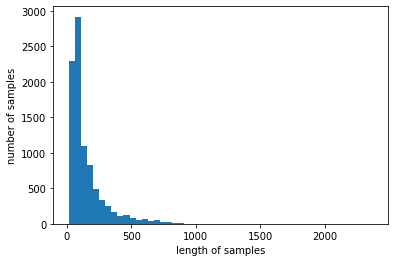

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50) #기준을 50으로 나눠 분포도를 만들겠다.
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [11]:
total_data_text = list(x_train)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  145.5398574927633
문장길이 최대 :  2376
문장길이 표준편차 :  145.81413013409278
pad_sequences maxlen :  437
전체 문장의 0.9445557782231129%가 maxlen 설정값 이내에 포함됩니다. 


400 단어를 기준으로 패딩을 진행해 보도록 한다.



In [61]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
# index_to_word 의 앞에 특별토큰 넣어주기

In [62]:
import tensorflow as tf

train_inputs = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                       value=0,
                                                       padding='post',
                                                       truncating='post',
                                                       maxlen=400)

test_inputs = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=0,
                                                       padding='post',
                                                       truncating='post',
                                                       maxlen=400)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



In [53]:
len(train_inputs[0])

400

train 데이터는 400으로 패딩 처리 되었다.  
그리고 class 는 46 으로 one-hot encoding 되었다.

### 검증데이터 분리

In [35]:
len(train_inputs)

8982

In [63]:
# train 데이터의 약 10% 를 검증데이터로 사용

x_val = train_inputs[:982]   
y_val = y_train[:982]

# validation set을 제외한 나머지 약 8000건
partial_x_train = train_inputs[982:]  
partial_y_train = y_train[982:]


print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape)
print(y_val.shape)

(8000, 400)
(8000, 46)
(982, 400)
(982, 46)


In [64]:
vocab_size = 5000  # 어휘 사전의 크기입니다
word_vector_dim = 100  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

# RNN 방식

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(128))   
model.add(tf.keras.layers.Dense(46, activation='softmax'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_11 (Dense)             (None, 46)                5934      
Total params: 623,182
Trainable params: 623,182
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
63/63 [==============================] - 106s 2s/step - loss: 2.5882 - accuracy: 0.3363 - val_loss: 2.3970 - val_accuracy: 0.3534
Epoch 2/20
63/63 [==============================] - 103s 2s/step - loss: 2.4082 - accuracy: 0.3519 - val_loss: 2.4026 - val_accuracy: 0.3585
Epoch 3/20
63/63 [==============================] - 102s 2s/step - loss: 2.4504 - accuracy: 0.3506 - val_loss: 2.4407 - val_accuracy: 0.3493
Epoch 4/20
63/63 [==============================] - 105s 2s/step - loss: 2.4144 - accuracy: 0.3524 - val_loss: 2.3838 - val_accuracy: 0.3534
Epoch 5/20
63/63 [==============================] - 106s 2s/step - loss: 2.3927 - accuracy: 0.3529 - val_loss: 2.3864 - val_accuracy: 0.3585
Epoch 6/20
63/63 [==============================] - 104s 2s/step - loss: 2.3892 - accuracy: 0.3585 - val_loss: 2.3865 - val_accuracy: 0.3585
Epoch 7/20
63/63 [==============================] - 103s 2s/step - loss: 2.3777 - accuracy: 0.3635 - val_loss: 2.3890 - val_accuracy: 0.3585
Epoch 8/20
63

In [66]:
results = model.evaluate(test_inputs,  y_test, verbose=2)

print(results)

71/71 - 15s - loss: 2.0011 - accuracy: 0.5227
[2.0011274814605713, 0.5227070450782776]


0.52의 정확도가 나왔다!

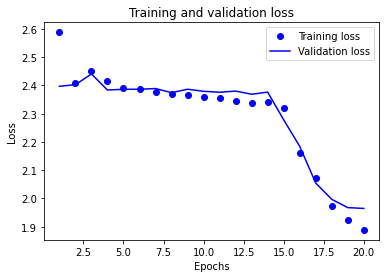

In [69]:
history_dict = history.history


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

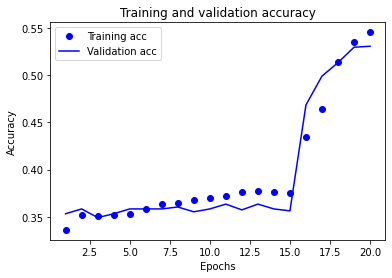

In [70]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

총 52% 의 정확도를 보였다.

RNN 모델도 epoch 값을 키우고 다양한 전처리 및  
RNN 모델에 맞는 데이터 수정을 거치면  
충분히 좋은 결과값을 보일 것으로 판단된다.

# 3. POTG
## 3-1. 소감

#### 👍 총체적인 Text classification 의 이해! 기본을 알았습니다.

지금껏 아리까리했던 embedding 과 vectorize, 모델선정, 평가지표 선정에 대해  
좀 더 확실하게 구분할 수 있는 계기가 되었습니다.

또한 머신러닝과 딥러닝에 정확히 어떤 차이가 있는지  
확연히 다른 모델과 과정을 진행하며 몸으로 느꼈습니다...!

## 3-2. 어려웠던 점과 극복방안

### 1. scikit-learn 에서 CountVectorizer() - `fit_transform`

DTM 을 만들어주는 method 이다. 그런데 단어가 10000개라면  
DTM 열도 10000개가 나와야 하는데, 이용 행태를 보면 그 수보다 작게  
구성되는 것이 보여졌다.

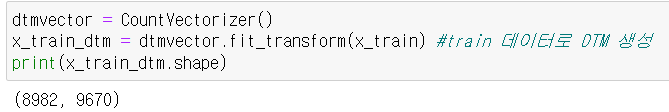

이유가 궁금해 scikit-learn 홈페이지에서 해당 method 설명을 읽었지만  
자세한 이유를 알려주지 않았다.

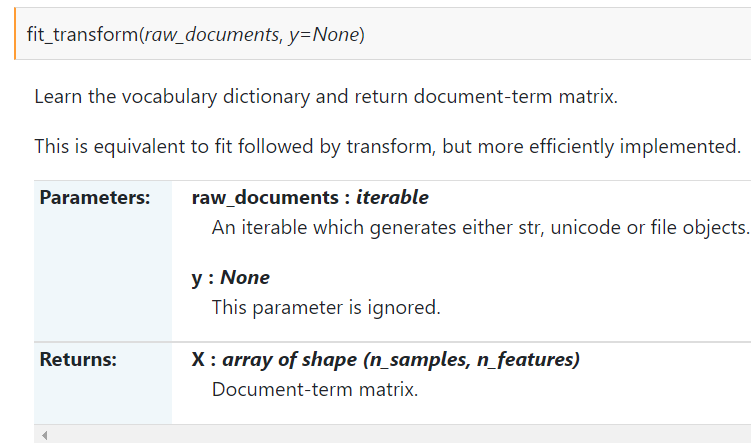

이유가 뭘까?


### 2. RNN 모델 선정

RNN 모델을 돌렸을 때, 정확도가 너무 멍청하게 나왔다. (0.04%)  
무슨 문제일까 predict report 를 반환했을 때의 결과이다.

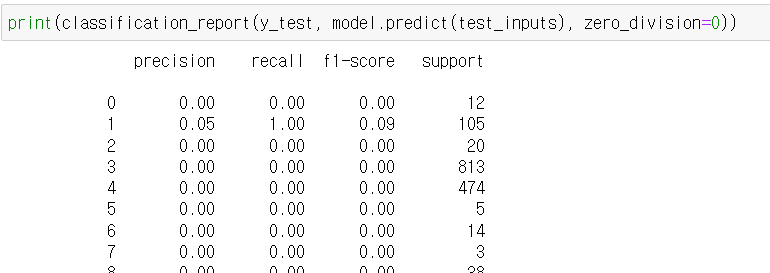

보면 1번 클래스만 정확도가 나오고 다른 클래스에 대해서는    
아무 조치를 하지 못함을 알 수 있다.

때문에 현 RNN 모델이 0과 1로만 결과값을 내고있는지에 대한 의문이 들었다.  
class 결과에 대해 영향을 주는 함수는 `binary_crossentropy` 라는 생각을 했다.

이는 이진 분류 모델에서 쓰이는 loss 함수이기 때문이다.   
탐색결과 이진 분류에서는 sigmoid 함수와 함께 binary_crossentropy 를 사용한다고 한다.

[탐색 결과 링크 : RNN 다중 분류 라고 검색](https://wikidocs.net/36033)

그래서 sigmoid 를 다중 분류에 적합한 `softmax`로 바꾸고    `categorical_crossentropy` loss 함수를 사용했다.

그래도 결과가 안나와서 더 자세히 찾아본 결과  
`softmax` 함수의 분류 수를 46으로 바꿔주어야 했다.  
hiiden_unit (LSTM) 의 h 값은 어느 정도가 적정한지 잘 모르겠다.  
우선 레이어의 중첩을 염두하여 128로 설정했다.  

그 다음으로는 다음과 같은 error 가 호출되었다.

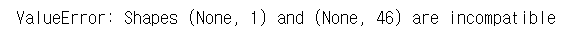

어딘가에 None,1 차원의 데이터가 있나본데,  
이것을 어떻게 막아줄 수 있을지 고민했다.

서칭중 캐글에서 관련된 자료를 찾을 수 있었다.  
[캐글 : ValueError](https://www.kaggle.com/general/197993)

단순한 categorical crossentrophy 는  class 가 one-hot encoding 에서만   
작동한다고 한다. 때문에 1에서 46 class 숫자데이터를 다루기 위해선   
`sparse_categorical_crossentropy` 를 loss 로 사용하라고 한다.

사용 결과 정확도가 좋지 않았다.

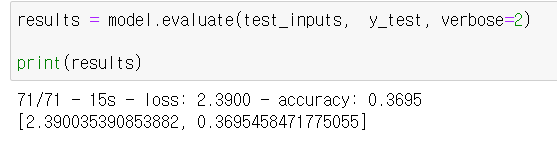

그래서 원핫인코딩 변환 후 다시 진행하였다.

결과적으로 39%였던 결과를 52%로 올릴 수 있었다.
다만 탐색 중 결과로 나왔던 RNN 모델은

나와 다른 조건을 주고 72%까지 끌어냈다
[그곳의 링크](https://wikidocs.net/22933)

나와 크게 다른 점은

전처리에서 패딩 처리,  
`vocab_size` : 1000  
`n_dim` : 128  
`hidden_state` :128  

이다.

혹시 더 높은 성과를 끌어올리고 싶다면 시도해보길,  
다만 난 머신러닝과의 비교를 위해 여기까지만 시도해 보았다.

### 3. padding method

`pad_sequence` 메서드를 사용할 때 파라미터에 대해 더 깊이 이해했다.

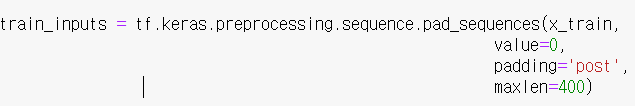

여기까지만 작성하면 400 단어 이상의 문장들은  
앞 단어가 지워지게 된다.

뉴스 자료 특성상 주제는 앞에 몰려있다. 때문에 뒷 단어를 지우는    
`truncating='post'` 메서드를 추가해야 한다.

### 4. 시간 비교 (`datetime` 라이브러리 vs 매직커맨드)

모델학습 간 걸리는 시간을 비교하기 위해 처음에는 `datetime` 라이브러리를  
사용하려고 하였으나, 단위가 맞지 않아 발생하는 이슈가 생겼다.

그래서 결과적으로는 쥬피터 노트북 내부에서 사용할 수 있는 매직커맨드를  
이용했다.  


## 3-3. 추후

머신러닝에서는 '끼니'와 '밥' 같은 유의어 처리가 되지 않기 때문에  
요즘은 맥락을 이해하는 딥러닝 처리가 각광받고 있는 추세이다.  

때문에 딥러닝 의 NLP 중 핵심이라고 할 수 있는  
어텐션 에 대해서 좀 더 공부할 예정이다.